An example to evaluate the quality of feature for transfer learning.

Features on CUB-200 are extracted from a pre-trained Inception-V3 on iNat-2017 based on 'feature_extraction.py'.
A simple logistic regression model is able to achieve 89.9% accuracy on CUB-200.
For qualitative results, we also show kNN retrieved images.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KDTree
import skimage.io as io
import time
import os

In [2]:
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=100)

(889260, 2048)
(889260,)
(222316, 2048)
(222316,)


/home/tom-maverick/Documents/02_GitHub/cvpr18-inaturalist-transfer/.venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.999163
Elapsed Time: 4030.439855 s


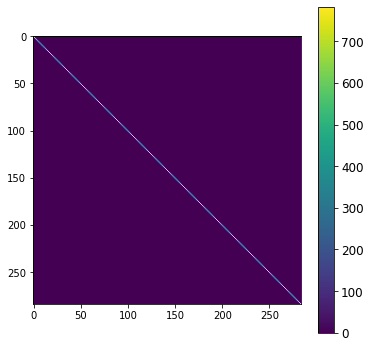

In [3]:
# pretrain_model = 'inception_v3_iNat_299'
# dataset = 'haute_garonne'

# load_dir = os.path.join('./feature', pretrain_model)
# features_train = np.load(os.path.join(load_dir, dataset + '_feature_train.npy'))
# labels_train = np.load(os.path.join(load_dir, dataset + '_label_train.npy'))
# features_val = np.load(os.path.join(load_dir, dataset + '_feature_val.npy'))
# labels_val = np.load(os.path.join(load_dir, dataset + '_label_val.npy'))
pretrain_model = 'inception_v3_iNat_299'
dataset = 'haute_garonne'

load_dir = os.path.join('./feature', pretrain_model)
features_train = np.load(os.path.join(load_dir, dataset + '_train_balanced.npy'))
labels_train = np.load(os.path.join(load_dir, dataset + '_train_labels_balanced.npy'))
features_val = np.load(os.path.join(load_dir, dataset + '_val_balanced.npy'))
labels_val = np.load(os.path.join(load_dir, dataset + '_val_labels_balanced.npy'))
print(features_train.shape)
print(labels_train.shape)
print(features_val.shape)
print(labels_val.shape)

tic = time.time()
LR.fit(features_train, labels_train)
labels_pred = LR.predict(features_val)

num_class = len(np.unique(labels_train))
acc = np.zeros((num_class, num_class), dtype=np.float32)
for i in range(len(labels_val)):
    acc[int(labels_val[i]), int(labels_pred[i])] += 1.0

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(acc)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)

print('Accuracy: %f' % (sum([acc[i,i] for i in range(num_class)]) / len(labels_val)))
print('Elapsed Time: %f s' % (time.time() - tic))

In [1]:
data_dir = './data'
train_list = []
val_list = []
for line in open(os.path.join(data_dir, dataset, 'train.txt'), 'r'):
    train_list.append(
        (os.path.join(data_dir, dataset, line.strip().split(': ')[0]),
        int(line.strip().split(': ')[1])))
for line in open(os.path.join(data_dir, dataset, 'val.txt'), 'r'):
    val_list.append(
        (os.path.join(data_dir, dataset, line.strip().split(': ')[0]),
        int(line.strip().split(': ')[1])))

# build KDTree
kdt = KDTree(features_train, leaf_size=30, metric='euclidean')

NameError: name 'os' is not defined

Query image from validation set:


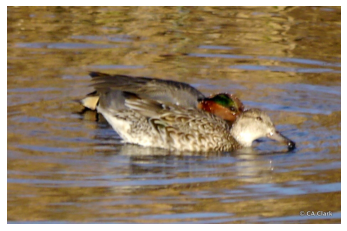

5-NN images from training set:


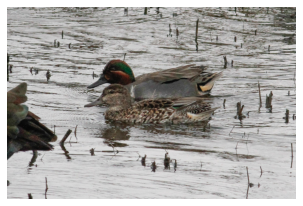

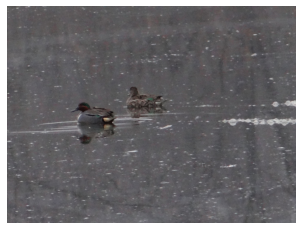

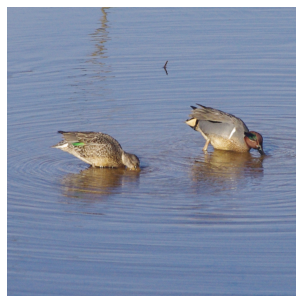

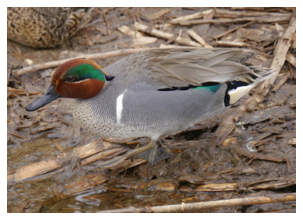

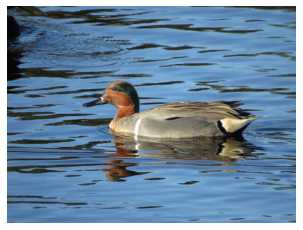

In [6]:
K = 5
q_ind = 500 # query image id
dist, ind = kdt.query(features_val[q_ind:q_ind+1], k=K)

print('Query image from validation set:')
I = io.imread(val_list[q_ind][0])
plt.axis('off')
plt.imshow(I)
plt.show()

print('%d-NN images from training set:' %K)
for i in range(K):
    plt.figure(figsize=(30,30))
    plt.subplot(1, K, i+1)
    I = io.imread(train_list[ind[0,i]][0])
    plt.axis('off')
    plt.imshow(I)
plt.show()